In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd
from scipy.io import wavfile
import pandas as pd
from novfn import *
from tempo import *
from beat import *

# Part 1: Superflux Audio Novelty Functions

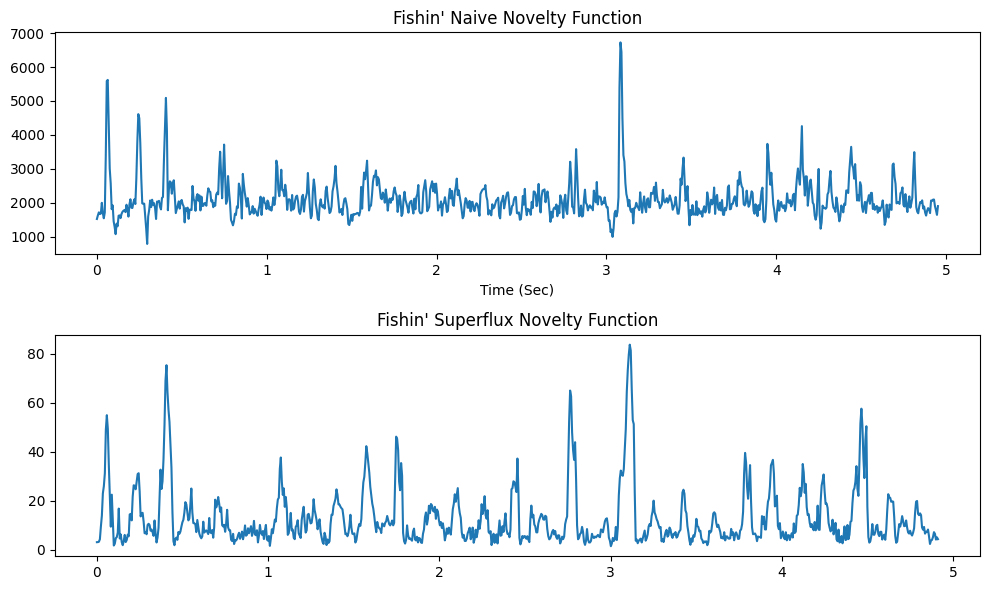

In [2]:
sr, x = wavfile.read("fishin.wav")
x = x/32768.0
hop_length = 256
win_length = 2048
mu = 8
y1 = get_novfn(x, sr, hop_length, win_length)
y2 = get_superflux_novfn(x, sr, hop_length, win_length, mu=mu, Gamma=1, max_win=3)
  
plt.figure(figsize=(10, 6))
plt.subplot(211)
plt.plot(np.arange(len(y1))*hop_length/sr, y1)
plt.title("Fishin' Naive Novelty Function")
plt.xlabel("Time (Sec)")
  
plt.subplot(212)
plt.plot(np.arange(len(y2))*hop_length/sr, y2)
plt.title("Fishin' Superflux Novelty Function")
plt.tight_layout()

In [3]:
s1 = sonify_novfn(y1, hop_length)
ipd.Audio(s1, rate=sr)

In [4]:
s2 = sonify_novfn(y2, hop_length)
ipd.Audio(s2, rate=sr)

# Part 2: Tempo Estimation

## Fourier-Based Tempo Estimation

In [5]:
sr, x = wavfile.read("Testing/Audio/train4.wav")
hop_length = 512
win_length = 2048
max_win = 3
mu = 4
Gamma = 1
novfn = get_superflux_novfn(x, sr, hop_length, win_length, max_win, mu, Gamma)
#novfn = novfn - np.mean(novfn) # Mean-center
print(get_fourier_tempo(novfn, hop_length, sr))

126.29248690845617


/var/folders/w9/gq97324j7bs80p9fwh67wvdr0000gn/T/ipykernel_21528/259953544.py:1: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sr, x = wavfile.read("Testing/Audio/train4.wav")


In [6]:
hop_length = 512
win_length = 2048
f_novfn = lambda x, hop_length, sr: get_novfn(x, sr, hop_length, win_length)
results = evaluate_tempos(f_novfn, get_fourier_tempo, hop_length)
ipd.HTML(results.to_html(escape=False, float_format='%.2f'))

/Users/hwilt/COLLEGE/2023_Junior_Year/Spring2023/CS372/CS372/Assignments/HW4_Rhythm/tempo.py:181: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sr, x = wavfile.read(f)


6 / 20


In [7]:
hop_length = 512
win_length = 2048
max_win = 6
mu = 8
Gamma = 1
f_novfn = lambda x, hop_length, sr: get_superflux_novfn(x, sr, hop_length, win_length, max_win, mu, Gamma)
results = evaluate_tempos(f_novfn, get_fourier_tempo, hop_length)
ipd.HTML(results.to_html(escape=False, float_format='%.2f'))

/Users/hwilt/COLLEGE/2023_Junior_Year/Spring2023/CS372/CS372/Assignments/HW4_Rhythm/tempo.py:181: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sr, x = wavfile.read(f)


8 / 20


## DFT-ACF Tempo Estimation

In [8]:
sr, x = wavfile.read("Testing/Audio/train5.wav")
hop_length = 512
win_length = 2048
max_win = 6
mu = 8
Gamma = 1
novfn = get_superflux_novfn(x, sr, hop_length, win_length, max_win, mu, Gamma)
print(get_acf_dft_tempo(novfn, hop_length, sr))

/var/folders/w9/gq97324j7bs80p9fwh67wvdr0000gn/T/ipykernel_21528/2482582142.py:1: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sr, x = wavfile.read("Testing/Audio/train5.wav")


67.99958881578948


In [9]:
hop_length = 512
win_length = 2048
max_win = 6
mu = 8
Gamma = 1
f_novfn = lambda x, hop_length, sr: get_superflux_novfn(x, sr, hop_length, win_length, max_win, mu, Gamma)
results = evaluate_tempos(f_novfn, get_acf_dft_tempo, hop_length)
ipd.HTML(results.to_html(escape=False, float_format='%.2f'))

/Users/hwilt/COLLEGE/2023_Junior_Year/Spring2023/CS372/CS372/Assignments/HW4_Rhythm/tempo.py:181: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sr, x = wavfile.read(f)


10 / 20


# Part 3: Beat Tracking

## Sonifying Beats

In [10]:
sr = 44100
beats = get_gt_beats("Testing/Beattrack/train4.txt", 3) # Load in ground truth beats for annotator 3
sr, x = wavfile.read("Testing/Audio/train4.wav")
x = x/32768.0 # Put into the range [-1, 1]
y = sonify_beats(x, sr, beats)
ipd.Audio(y, rate=sr)

/var/folders/w9/gq97324j7bs80p9fwh67wvdr0000gn/T/ipykernel_21528/3561661012.py:3: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sr, x = wavfile.read("Testing/Audio/train4.wav")


In [11]:
sr = 44100
beats = get_gt_beats("Testing/Beattrack/train1.txt", 0) # Load in ground truth beats for annotator 0
sr, x = wavfile.read("Testing/Audio/train1.wav")
x = x/32768.0 # Put into the range [-1, 1]
y = sonify_beats(x, sr, beats)
ipd.Audio(y, rate=sr)

## Dynamic Programming Beat Tracking

In [ ]:
hop_length = 256
win_length = 2048
max_win = 6
mu = 1
Gamma = 1
sr, x = wavfile.read("Testing/Audio/train1.wav")
x = x/32768.0
novfn = get_superflux_novfn(x, sr, hop_length, win_length, max_win, mu, Gamma)

beats = get_beats(novfn, sr, hop_length, 120, 1)
plt.figure(figsize=(12, 5))
plot_beats(novfn, beats, sr, hop_length)
plt.xlim([0, 10])
y = sonify_beats(x, sr, beats)
ipd.Audio(y, rate=sr)

In [ ]:
hop_length = 256
win_length = 2048
max_win = 6
mu = 4
Gamma = 1
sr, x = wavfile.read("Testing/Audio/train2.wav")
x = x/32768.0
novfn = get_superflux_novfn(x, sr, hop_length, win_length, max_win, mu, Gamma)
 
beats = get_beats(novfn, sr, hop_length, 167, 200)
plt.figure(figsize=(12, 5))
plot_beats(novfn, beats, sr, hop_length)
plt.xlim([0, 10])
y = sonify_beats(x, sr, beats)
#plt.savefig("Beat_1_120_100.svg", bbox_inches='tight')
ipd.Audio(y, rate=sr)

In [ ]:
hop_length = 256
win_length = 2048
max_win = 6
mu = 4
Gamma = 1
sr, x = wavfile.read("Testing/Audio/train3.wav")
x = x/32768.0
novfn = get_superflux_novfn(x, sr, hop_length, win_length, max_win, mu, Gamma)
 
beats = get_beats(novfn, sr, hop_length, 153, 200)
plt.figure(figsize=(12, 5))
plot_beats(novfn, beats, sr, hop_length)
plt.xlim([0, 10])
y = sonify_beats(x, sr, beats)
#plt.savefig("Train2_Beattrack.svg", bbox_inches='tight')
ipd.Audio(y, rate=sr)